# Task
Implement a k-NN classifier from scratch to detect fraud using the "creditcard.csv" dataset. This involves loading the data, performing exploratory data analysis, preprocessing the data (including splitting into training, validation, and test sets), implementing k-NN with Euclidean and Manhattan distance metrics and weighted voting, experimenting with different k-values, and finally evaluating the best performing model on the test set.

## Load Data and Initial Inspection

### Subtask:
Load the 'creditcard.csv' dataset into a pandas DataFrame and perform an initial inspection to understand its structure, data types, and check for any immediate issues. This includes displaying the first few rows, checking data types, and getting a summary of descriptive statistics.


**Reasoning**:
To begin, I will import the pandas library to handle data manipulation and then load the 'creditcard.csv' dataset into a DataFrame. Subsequently, I will display the first few rows, check the data types, and generate descriptive statistics to understand the dataset's structure and initial characteristics.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Check data types
print("\nData types of each column:")
print(df.info())

# Generate descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

**Reasoning**:
The initial inspection revealed missing values in several columns. To address this, I will check the count of missing values and drop rows that contain them, as it appears to be a small number of rows based on the previous output.



In [ ]:
print("Number of missing values before dropping:\n", df.isnull().sum())

# Drop rows with any missing values
df.dropna(inplace=True)

print("\nNumber of missing values after dropping:\n", df.isnull().sum())
print("\nShape of the DataFrame after dropping rows with missing values:", df.shape)

Number of missing values before dropping:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Number of missing values after dropping:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Shape of the DataFrame after dropping rows with missing values: (237696, 31)


**Reasoning**:
To continue the initial inspection and ensure data quality, I will check for and remove any duplicate rows from the DataFrame, as duplicates can bias subsequent analysis and model training.



In [ ]:
print("Number of duplicate rows before dropping:", df.duplicated().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

print("\nNumber of duplicate rows after dropping:", df.duplicated().sum())
print("\nShape of the DataFrame after dropping duplicate rows:", df.shape)

Number of duplicate rows before dropping: 884

Number of duplicate rows after dropping: 0

Shape of the DataFrame after dropping duplicate rows: (236812, 31)


## Exploratory Data Analysis (EDA)

### Subtask:
Perform a comprehensive EDA. This involves analyzing the distribution of features using histograms and box plots, identifying the presence and patterns of missing values, and exploring relationships between features, including correlations, especially with the target variable 'Class'. Visualize the class distribution as well, as it's a fraud detection dataset.


**Reasoning**:
The first step in EDA is to understand the distribution of the target variable 'Class' to check for class imbalance. I will use `value_counts()` to get the counts and then visualize it using a bar plot with clear labels.



Class distribution:
Class
0.0    236399
1.0       413
Name: count, dtype: int64


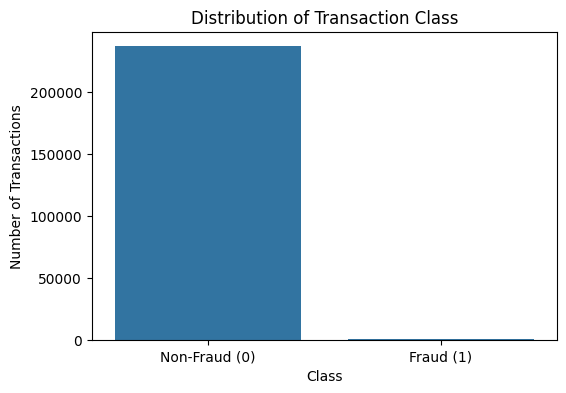

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check the distribution of the target variable 'Class'
print("Class distribution:")
print(df['Class'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Transaction Class')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

**Reasoning**:
Now, I will plot histograms for the 'Time' and 'Amount' features to observe their distributions. This will help in understanding the range and frequency of values for these key features.



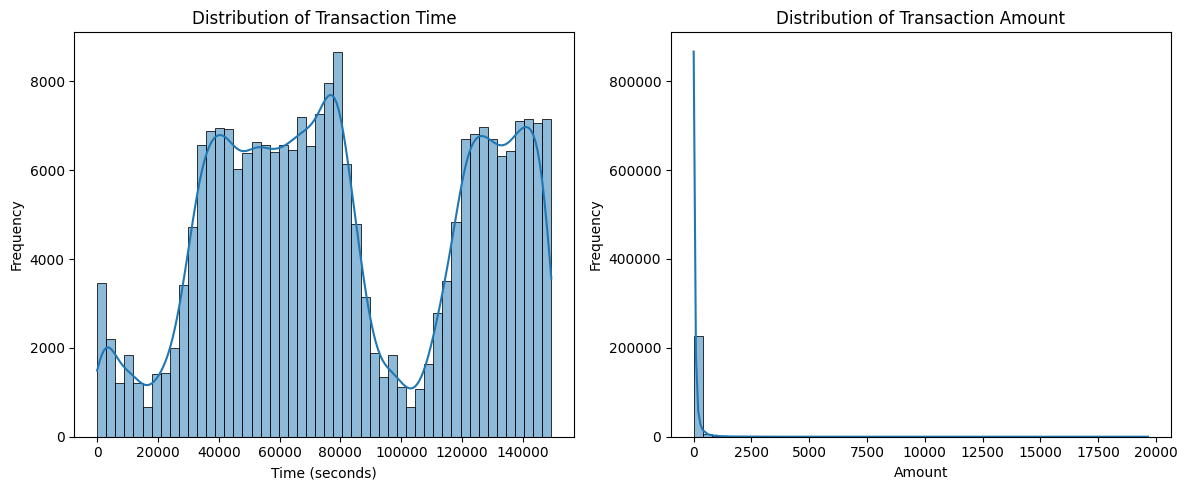

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will generate box plots for the 'Time' and 'Amount' features to visualize their spread and identify potential outliers, as per the EDA instructions.



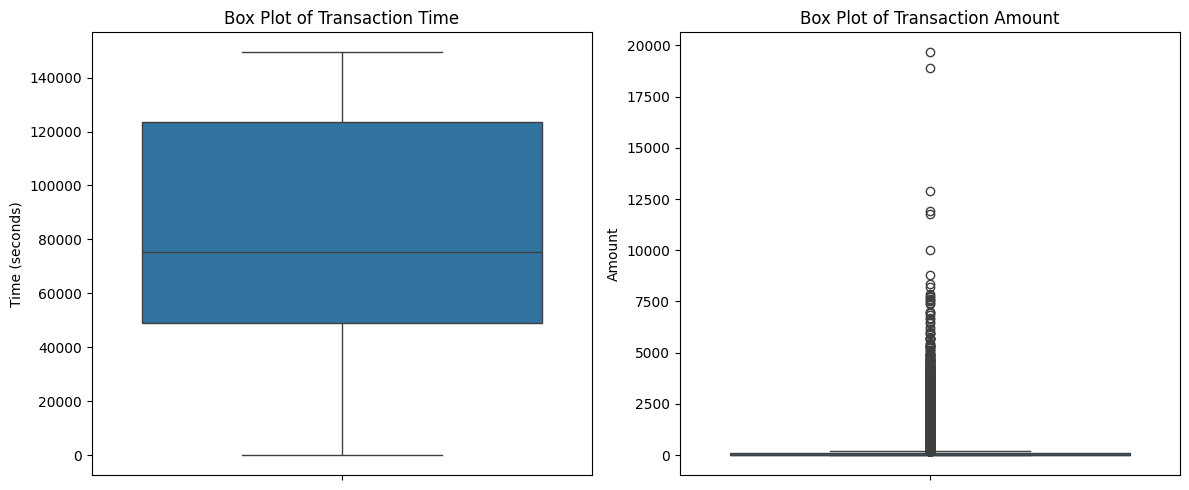

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Time'])
plt.title('Box Plot of Transaction Time')
plt.ylabel('Time (seconds)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Amount'])
plt.title('Box Plot of Transaction Amount')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

**Reasoning**:
As per the EDA instructions, I will generate histograms for a selection of 'V' features (V1 to V5) to understand their individual distributions.



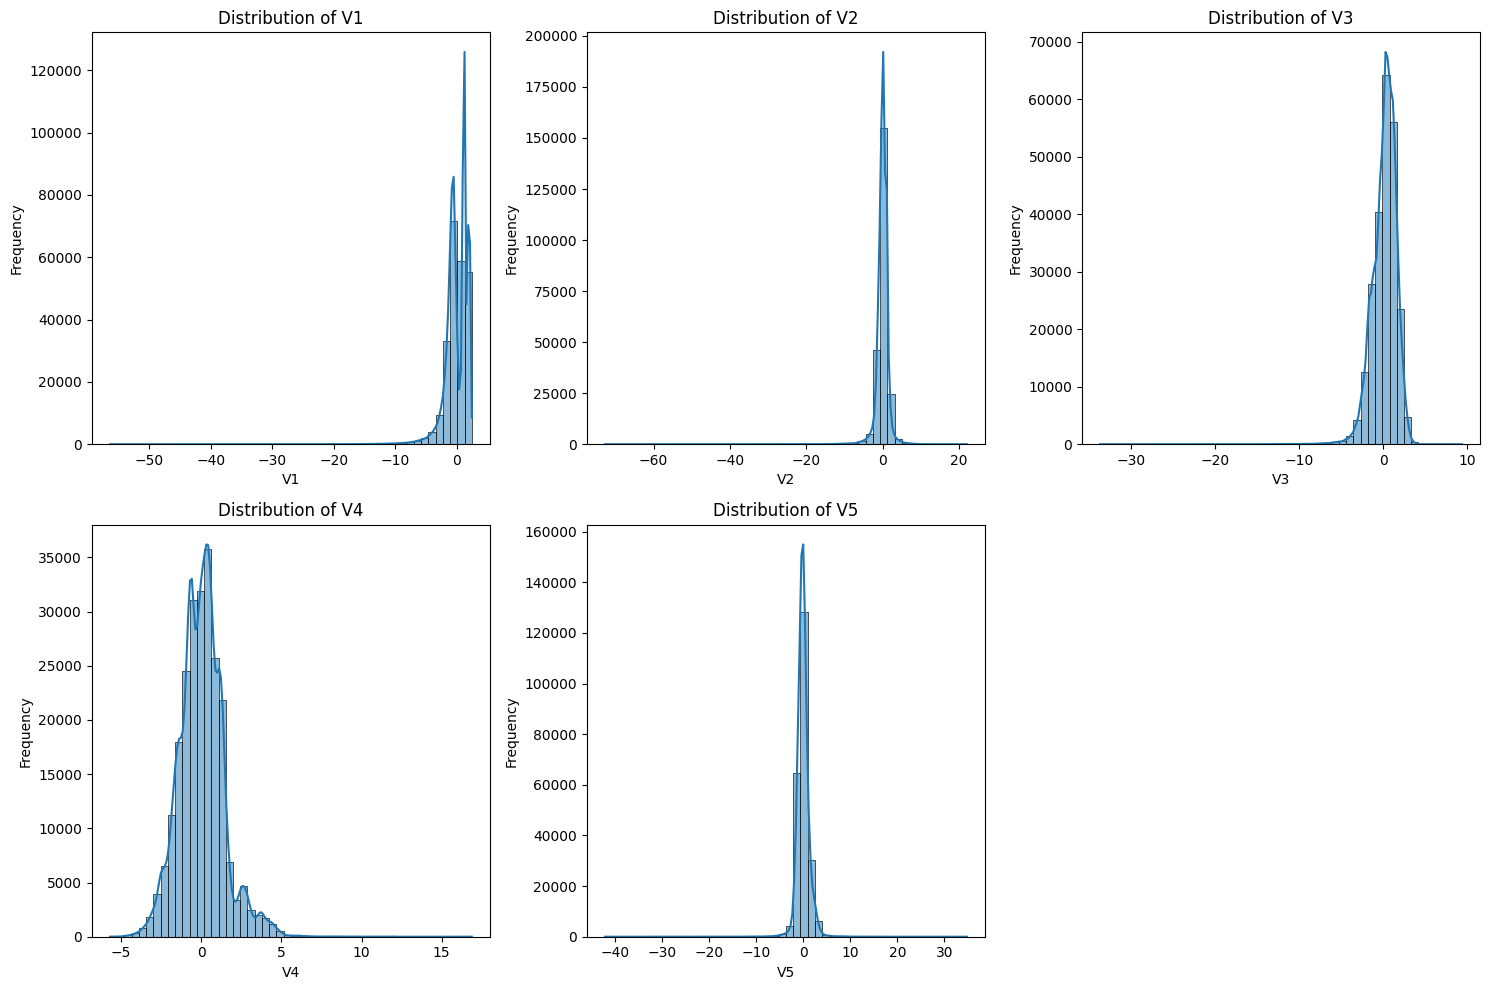

In [ ]:
plt.figure(figsize=(15, 10))

v_features = ['V1', 'V2', 'V3', 'V4', 'V5']

for i, feature in enumerate(v_features):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid for the plots
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
Next, I will compute the correlation matrix for all features and visualize it using a heatmap to understand the relationships between variables, especially with the target variable 'Class', as per the EDA instructions.



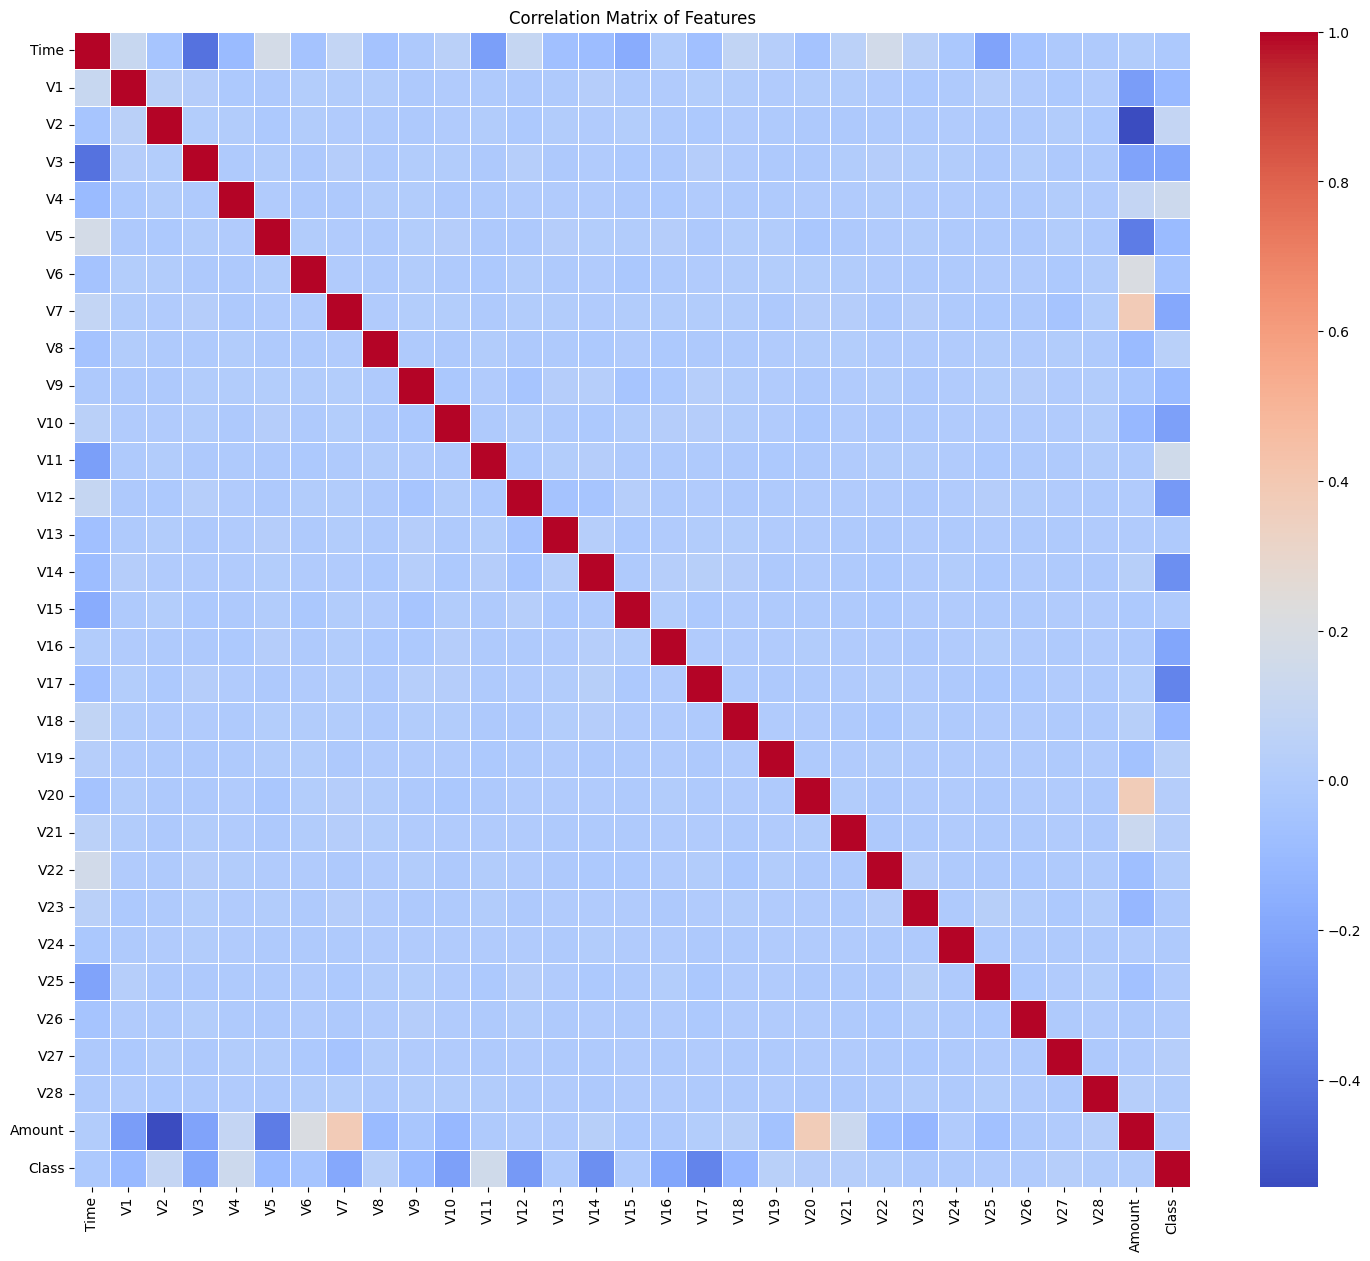

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Data Preprocessing

### Subtask:
Preprocess the data. This step includes handling any missing values identified during EDA (e.g., imputation or removal), encoding categorical variables if present, and normalizing/standardizing numerical features using appropriate scaling techniques (e.g., StandardScaler) since k-NN is sensitive to feature scales. Finally, split the preprocessed data into training (70%), validation (15%), and test (15%) sets.


**Reasoning**:
The first step in data preprocessing is to separate the features (all columns except 'Class') into `X` and the target variable ('Class') into `y`.



In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

print("Shape of X (features):")
print(X.shape)
print("Shape of y (target):")
print(y.shape)

Shape of X (features):
(236812, 30)
Shape of y (target):
(236812,)


**Reasoning**:
I will import the necessary libraries, then split the data into training (70%), validation (15%), and test (15%) sets, ensuring stratification by the target variable. After splitting, I will apply StandardScaler to the feature sets to normalize them, as k-NN is sensitive to feature scales. Finally, I will print the shapes of all resulting datasets to verify the splits and transformations.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split data into initial training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Split temporary set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Initialize StandardScaler
scaler = StandardScaler()

# 4. Fit on training data and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for consistency and easier handling (optional but good practice for EDA/inspection later)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print shapes to verify
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val_scaled:", X_val_scaled.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_scaled: (165768, 30)
Shape of y_train: (165768,)
Shape of X_val_scaled: (35522, 30)
Shape of y_val: (35522,)
Shape of X_test_scaled: (35522, 30)
Shape of y_test: (35522,)


## Implement k-NN Classifier from Scratch

### Subtask:
Develop a k-NN classifier from scratch. This custom implementation should include functions or methods to calculate both Euclidean and Manhattan distances between data points. It must also support weighted voting, where the contribution of each neighbor to the classification decision is weighted by its inverse distance from the query point.


**Reasoning**:
I will define a `euclidean_distance` function using `numpy` to calculate the Euclidean distance between two data points, as it's the first step in implementing the k-NN classifier and is required for the main `knn_predict` function.



In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculates the Euclidean distance between two points.
    """
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

print("Euclidean distance function defined.")

Euclidean distance function defined.


**Reasoning**:
Next, I will define a `manhattan_distance` function using `numpy` to calculate the Manhattan distance between two data points, as instructed by the subtask for implementing the k-NN classifier.



In [ ]:
def manhattan_distance(point1, point2):
    """
    Calculates the Manhattan distance between two points.
    """
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

print("Manhattan distance function defined.")

Manhattan distance function defined.


**Reasoning**:
Next, I will define a `weighted_vote` function that handles a list of neighbor labels and their corresponding distances, calculates weighted votes for each class, and returns the class with the highest vote, as specified in the subtask.



In [ ]:
def weighted_vote(neighbor_labels, neighbor_distances):
    """
    Calculates the weighted vote for classification.
    Weights are inverse of distances.
    Handles division by zero for distances.
    """
    votes = {0: 0, 1: 0} # Initialize votes for classes 0 and 1
    epsilon = 1e-6 # Small value to avoid division by zero

    for i in range(len(neighbor_labels)):
        label = neighbor_labels[i]
        distance = neighbor_distances[i]

        if distance == 0:
            weight = 1.0 / epsilon # Assign a very large weight for zero distance
        else:
            weight = 1.0 / distance

        votes[int(label)] += weight

    # Return the class with the highest weighted vote
    if votes[0] > votes[1]:
        return 0
    else:
        return 1 # If tied, or votes[1] is greater, return 1

print("Weighted vote function defined.")

Weighted vote function defined.


**Reasoning**:
I will define the main `knn_predict` function, which will take the training data, a test point, the number of neighbors `k`, and a distance metric function. It will compute distances, find the k-nearest neighbors, and use the `weighted_vote` function to predict the class, thus completing the k-NN implementation as per the subtask instructions.



In [ ]:
def knn_predict(X_train, y_train, test_point, k, distance_metric_func):
    """
    Predicts the class of a single test point using k-NN with weighted voting.
    """
    distances = []
    for i in range(len(X_train)):
        dist = distance_metric_func(X_train.iloc[i], test_point)
        distances.append((dist, y_train.iloc[i]))

    # Sort by distance and get the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]

    # Extract labels and distances of k-nearest neighbors
    neighbor_labels = [neighbor[1] for neighbor in k_nearest_neighbors]
    neighbor_distances = [neighbor[0] for neighbor in k_nearest_neighbors]

    # Use weighted voting to get the prediction
    prediction = weighted_vote(neighbor_labels, neighbor_distances)
    return prediction

print("k-NN prediction function defined.")

k-NN prediction function defined.


## Experiment with k-values and Distance Metrics

### Subtask:
Utilize the custom k-NN classifier to experiment with different k values (1, 3, 5, 7, 10) and both Euclidean and Manhattan distance metrics. Train and evaluate the model's performance on the validation set for each combination of k and distance metric. Track key performance metrics such as accuracy, precision, recall, and F1-score to determine the optimal configuration.


**Reasoning**:
I will define the `evaluate_model` function to compute accuracy, precision, recall, and F1-score, as requested in the instructions, using `sklearn.metrics` and handling potential `UndefinedMetricWarning`.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    """
    Calculates accuracy, precision, recall, and F1-score.
    """
    accuracy = accuracy_score(y_true, y_pred)
    # Set zero_division=0 to handle cases where no positive predictions or true positives exist
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return accuracy, precision, recall, f1

print("evaluate_model function defined.")

evaluate_model function defined.


**Reasoning**:
Now that the evaluation function is defined, I will set up the parameters for the k-NN experimentation (k-values and distance metrics) and initialize a structure to store the results. This is the next logical step before commencing the actual model training and evaluation loop.



In [ ]:
k_values = [1, 3, 5, 7, 10]
distance_metrics = {
    'euclidean': euclidean_distance,
    'manhattan': manhattan_distance
}

results = []

print("k_values and distance_metrics defined, results list initialized.")

k_values and distance_metrics defined, results list initialized.


**Reasoning**:
I will now implement the nested loops to iterate through each k-value and distance metric, make predictions on the validation set using the custom `knn_predict` function, evaluate the model performance with `evaluate_model`, and store the results. Given the size of the validation set and training set, this process will be computationally intensive and may take a significant amount of time to execute.



In [ ]:
print("Starting k-NN experimentation. This process can be computationally intensive and may take a long time.")

for k in k_values:
    for metric_name, metric_func in distance_metrics.items():
        print(f"\nExperimenting with k={k} and metric={metric_name}")

        y_pred = []
        # Iterate through the validation set to make predictions
        # For large datasets, this loop might be very slow.
        for i in range(len(X_val_scaled)): # Iterate directly over indices
            test_point = X_val_scaled.iloc[i] # Get the row as a Series
            prediction = knn_predict(X_train_scaled, y_train, test_point, k, metric_func)
            y_pred.append(prediction)

            # Optional: Print progress to monitor long running operations
            if (i + 1) % 1000 == 0: # Print every 1000 predictions
                print(f"  Processed {i+1}/{len(X_val_scaled)} validation points...")

        # Convert predictions to a numpy array for evaluation
        y_pred = np.array(y_pred)

        # Evaluate the model
        accuracy, precision, recall, f1 = evaluate_model(y_val, y_pred)

        # Store the results
        results.append({
            'k': k,
            'metric': metric_name,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

        print(f"  Finished k={k}, metric={metric_name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}")

# Display all results
print("\n--- Experiment Results ---")
for res in results:
    print(res)


Starting k-NN experimentation. This process can be computationally intensive and may take a long time.

Experimenting with k=1 and metric=euclidean
